In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as C
from astropy import units
from scipy.optimize import root
from scipy.special import lambertw as W
import scipy.optimize as spopt

(2.552802064324e-24-0j) 28.84336531091868 28.843365310919793


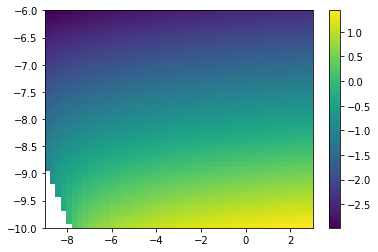

In [39]:
#x = np.linspace()

Mp = (np.sqrt(C.hbar*C.c/(8*np.pi*C.G))*C.c**2).to('GeV')
m = 100*units.GeV
sigma = 3*10**(-26) * (units.cm**3/units.s)/C.c
sigma_GeV = (sigma/(C.hbar*C.c)**2).to(units.GeV**(-2))

def func(x, A):
    return np.exp(-x) - A*x**(-1/2)

@np.vectorize
def solver(a):
    if a>1/np.sqrt(2*np.exp(1))-1e-3:
        return np.nan
    
    return spopt.bisect(func, 1, 1/a, args=a)

A = (1/(m*Mp*sigma_GeV)).to('').value

#x_f0 = root(func, 1, A).x
x_f0 = spopt.bisect(func, 1, 100, args=A)
print(-1/2* W(-2*A**2), solver(A), x_f0)

m = np.logspace(-9, 3, 50)[:, None] * units.GeV
s = np.logspace(-10, -6, 50)[None, :] * units.GeV**(-2)
A2 = (1/(m*Mp*s)).to('').value
#x_f0 = -1/2* W(-2*A2**2).real
# x_f0 = root(func, np.full_like(A2, 20).ravel(), A2.ravel()).x.reshape(A2.shape)

x_f0 = solver(A2)

omega = 0.2*(x_f0/20)*(10**(-8)*units.GeV**-2/s)
plt.pcolormesh(np.log10(m[:, 0].value), np.log10(s[0, :].value), np.log10(omega.T))

plt.colorbar()

In [ ]:
plt.pcolormesh(np.log10(m[:, 0].value), np.log10(s[0, :].value), (x_f0.T))

plt.colorbar()

In [ ]:
print(x_f0)

In [ ]:
sigma_GeV

In [11]:
((1e-28*units.cm**2)/(C.hbar*C.c)**2).to(units.GeV**(-2))

<Quantity 0.25681895 1 / GeV2>